In [153]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [154]:
df = pd.read_csv("./data/citations_data/thinktank_citations_tdm.csv", index_col=0)
tt_df = pd.read_csv("./data/thinktank_data/thinktank_features.csv", index_col=0)

In [156]:
df['date']=df['date'].apply(lambda x: pd.to_datetime(x))
df['year'] = df['date'].apply(lambda x: x.year)

In [157]:
df['cons'] = df['thinktank'].apply(lambda x: tt_df[tt_df['thinktank']==x]['conservative'].item())
df['lib'] = df['thinktank'].apply(lambda x: tt_df[tt_df['thinktank']==x]['libertarian'].item())

In [158]:
df['cons_lib'] = df.apply(lambda x: max(x.cons, x.lib), axis=1)

In [159]:
panel = df.groupby(['pub', 'year', 'thinktank'])['sentence'].count().reset_index().rename(columns={'sentence':'citations'})

# Distribution of Citations

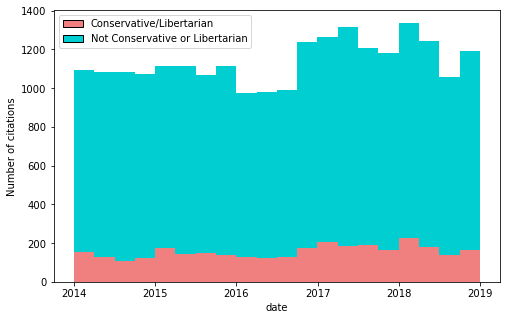

In [162]:
# distribution of citations
hist_fig, hist_ax  = plt.subplots(figsize=(8, 5))
cons_years = df[df['cons_lib']==1]['date']
non_cons_years = df[df['cons_lib']==0]['date']
colors=['lightcoral', 'darkturquoise']
hist_ax.set_xlabel('date')
hist_ax.set_ylabel('Number of citations')
hist_ax.hist([cons_years, non_cons_years], stacked=True, color=colors, bins=20)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
hist_ax.legend(handles, ['Conservative/Libertarian', 'Not Conservative or Libertarian']);


In [148]:
hist_fig.savefig("./figures/citation_timeseries_by_political_leaning.png")

# Pie Charts of Political Leaning

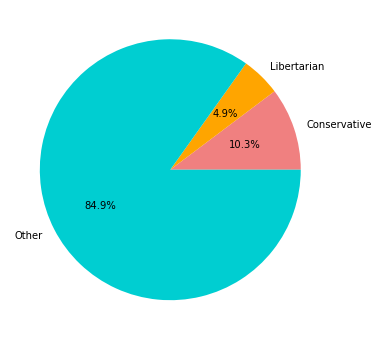

In [133]:
pie_fig, pie_ax = plt.subplots(figsize=(6, 6))
cons_count = df['cons'].sum()
lib_count = df['lib'].sum()
other_count = df.shape[0] - df['cons_lib'].sum()
pie_ax.pie([cons_count, lib_count, other_count], labels=['Conservative', 'Libertarian', 'Other'], 
           colors=['lightcoral', 'orange', 'darkturquoise'], autopct='%1.1f%%');

In [149]:
pie_fig.savefig("./figures/pie_chart_political_leaning.png")

# Topic Distribution

In [136]:
tagged_cite = pd.read_csv("./data/citations_data/thinktank_citations_tagged.csv", index_col=0)

In [138]:
econ_count = tagged_cite.econ_keyword.sum()
edu_count = tagged_cite.edu_keyword.sum()
health_count = tagged_cite.health_keyword.sum()
pol_count = tagged_cite.pol_keyword.sum()

Text(0.5, 0, 'Topic')

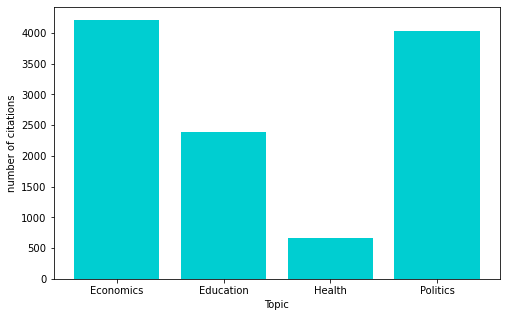

In [147]:
topic_fig, topic_ax = plt.subplots(figsize=(8, 5))
topic_ax.bar(x=['Economics', 'Education', 'Health', 'Politics'], height=[econ_count, edu_count, health_count, pol_count],
       color='darkturquoise')

topic_ax.set_ylabel('number of citations')
topic_ax.set_xlabel('Topic')

In [150]:
topic_fig.savefig("./figures/citation_distribution_by_topic.png")